In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear"
)

Found 61490 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear"
)

Found 13164 files belonging to 38 classes.


In [4]:
# Define the CNN model
cnn = tf.keras.models.Sequential()

# 1st Convolutional Block
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# 2nd Convolutional Block
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# 3rd Convolutional Block
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Dropout layer to avoid overfitting
cnn.add(tf.keras.layers.Dropout(0.3))

# Flattening and Fully Connected Layers
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))

# Output Layer - Reduce the number of units to match your class count (38 here)
cnn.add(tf.keras.layers.Dense(units=38, activation='softmax'))

# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])




c:\Users\bhasw\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Model summary
cnn.summary()

In [7]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Train the model with early stopping
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10, callbacks=[early_stopping])


Epoch 1/10
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 524s 273ms/step - accuracy: 0.4350 - loss: 2.0864 - val_accuracy: 0.8301 - val_loss: 0.5649
Epoch 2/10
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 442s 230ms/step - accuracy: 0.8539 - loss: 0.4777 - val_accuracy: 0.8935 - val_loss: 0.3417
Epoch 3/10
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 428s 223ms/step - accuracy: 0.9239 - loss: 0.2400 - val_accuracy: 0.9071 - val_loss: 0.2950
Epoch 4/10
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 429s 223ms/step - accuracy: 0.9567 - loss: 0.1356 - val_accuracy: 0.9206 - val_loss: 0.2726
Epoch 5/10
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 461s 240ms/step - accuracy: 0.9705 - loss: 0.0954 - val_accuracy: 0.9249 - val_loss: 0.2633
Epoch 6/10
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 561s 292ms/step - accuracy: 0.9758 - loss: 0.0745 - val_accuracy: 0.9189 - val_loss: 0.3016
Epoch 7/10
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 553s 288ms/step - accuracy: 0.9821 - loss: 0.0544 - val_accuracy: 0.9138 - val_loss: 0.3212
Epoch 8/10
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 556s 289ms/step - ac

In [8]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

1922/1922 ━━━━━━━━━━━━━━━━━━━━ 150s 78ms/step - accuracy: 0.9839 - loss: 0.0513
Training accuracy: 0.9860464930534363


In [9]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

412/412 ━━━━━━━━━━━━━━━━━━━━ 33s 80ms/step - accuracy: 0.9215 - loss: 0.2716
Validation accuracy: 0.9249468445777893


In [10]:
# Save the trained model in .h5 format
cnn.save('trained_plant_disease_model.h5')

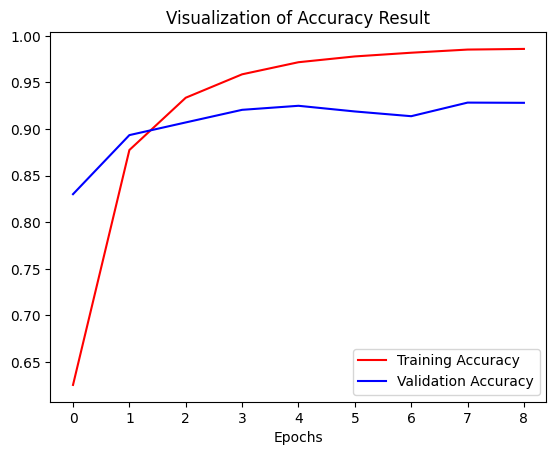

In [11]:
# Plotting accuracy
plt.plot(training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [12]:
# Prepare test set
test_set = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    interpolation="bilinear"
)

Found 13213 files belonging to 38 classes.


In [20]:
# Make predictions
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

# Get true categories
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

test_loss, test_acc = cnn.evaluate(test_set)
print('Testing accuracy:', test_acc)

13213/13213 ━━━━━━━━━━━━━━━━━━━━ 88s 7ms/step
13213/13213 ━━━━━━━━━━━━━━━━━━━━ 96s 7ms/step - accuracy: 0.9295 - loss: 0.2443
Testing accuracy: 0.9250738024711609


In [21]:
# Confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_true, predicted_categories)



In [17]:
# Precision Recall Fscore
print(classification_report(Y_true, predicted_categories, target_names=test_set.class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.88      0.89      0.89       378
                                 Apple___Black_rot       0.98      0.89      0.93       374
                          Apple___Cedar_apple_rust       0.88      0.98      0.93       330
                                   Apple___healthy       0.93      0.86      0.90       377
                               Blueberry___healthy       0.93      0.95      0.94       341
          Cherry_(including_sour)___Powdery_mildew       0.97      0.97      0.97       317
                 Cherry_(including_sour)___healthy       0.94      0.98      0.96       343
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.84      0.90       309
                       Corn_(maize)___Common_rust_       0.99      1.00      1.00       359
               Corn_(maize)___Northern_Leaf_Blight       0.84      0.98      0.

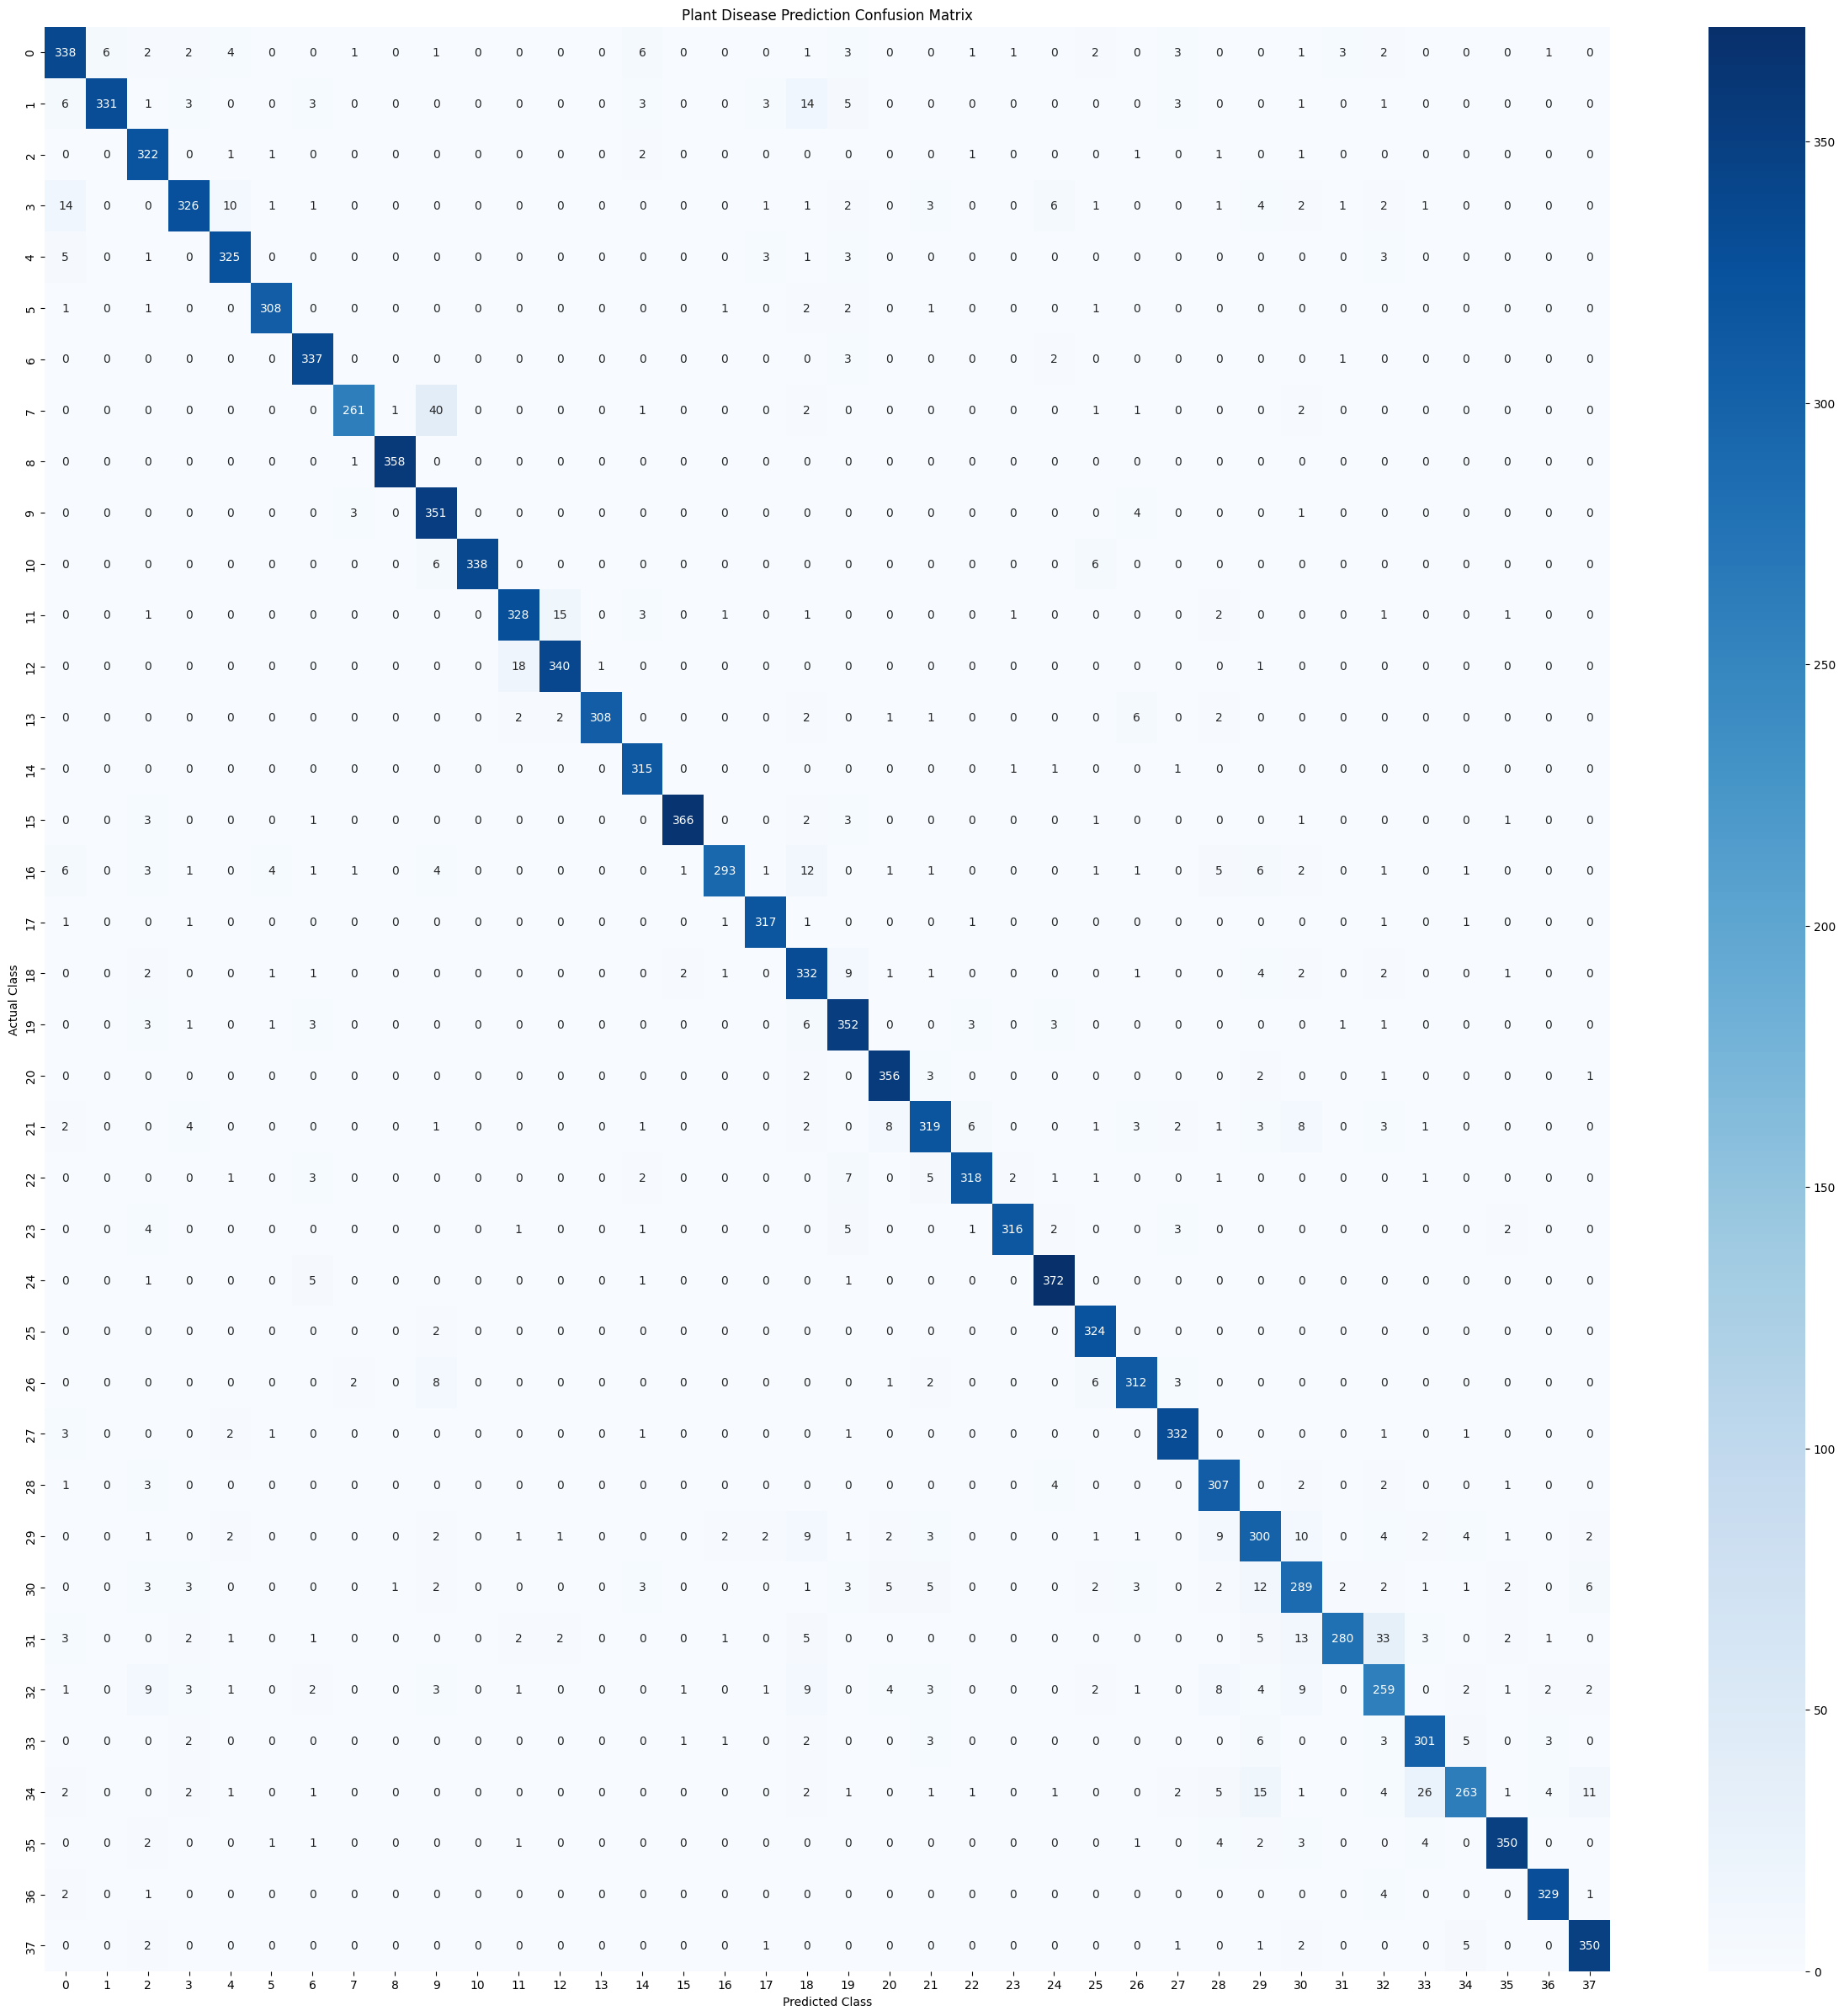

In [22]:
# Plot confusion matrix
plt.figure(figsize=(30, 30))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Plant Disease Prediction Confusion Matrix')
plt.show()